Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.24132103  0.24132103  0.24132103]
  [ 0.25624585  0.25624585  0.25624585]
  [ 0.29034417  0.29034417  0.29034417]
  ..., 
  [ 0.46640683  0.46640683  0.46640683]
  [ 0.14316961  0.14316961  0.14316961]
  [ 0.13816359  0.13816359  0.13816359]]

 [[-0.40286961 -0.40286961 -0.40286961]
  [-0.39092456 -0.39092456 -0.39092456]
  [-0.37019252 -0.37019252 -0.37019252]
  ..., 
  [-0.61289029 -0.61289029 -0.61289029]
  [-0.2430536  -0.2430536  -0.2430536 ]
  [-0.17272093 -0.17272093 -0.17272093]]

 [[-0.07457301 -0.07457301 -0.07457301]
  [-0.0813241  -0.0813241  -0.0813241 ]
  [-0.04675454 -0.04675454 -0.04675454]
  ..., 
  [ 0.0034274   0.0034274   0.0034274 ]
  [-0.07711778 -0.07711778 -0.07711778]
  [-0.01895377 -0.01895377 -0.01895377]]

 ..., 
 [[-0.01385198 -0.01385198 -0.01385198]
  [-0.03124881 -0.03124881 -0.03124881]
  [-0.04778372 -0.04778372 -0.04778372]
  ..., 
  [-0.01799206 -0.01799206 -0.01799206]
  [ 0.0732698   0.0732698   0.0732698 ]
  [ 0.10762053  0.10762053  0.10762

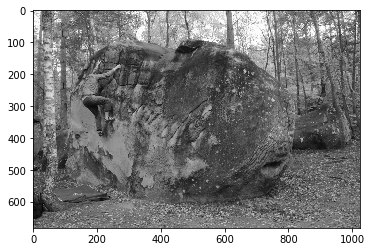

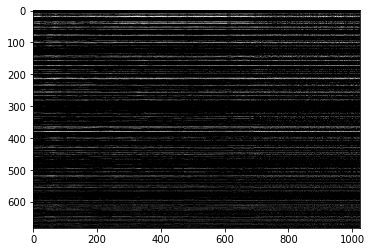

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig
import image_analysis as ima
from numpy.linalg import multi_dot

def matrix_to_image(input_matrix):
    """
    """
    dummy_image = np.ones((input_matrix.shape[0],input_matrix.shape[1],3))
    matrix_reshaped = np.asarray(input_matrix[:,:,np.newaxis])   #Reshape the values from a 2D Array to an ndarray
    image = matrix_reshaped*dummy_image
    
    return(image)

image = plt.imread('Boulder_image.jpg')

A, gray_image = ima.rgb_to_gray(image)
W = np.dot(A,A.transpose())
Wv = np.dot(A.transpose(),A)

W_eigenvalues, U = eig(W)
Wv_eigenvalues, V = eig(Wv)

S_entries = np.sqrt(W_eigenvalues)
S_entries = S_entries/np.max(S_entries)
S_entries_sorted = np.flip(np.sort(S_entries), axis=0)
sorting_indices_S = np.flip(np.argsort(S_entries), axis=0)
S = np.zeros_like(A)
np.fill_diagonal(S,S_entries_sorted)

U_sorted = U[sorting_indices_S]

sorting_indices_V = np.flip(np.argsort(np.sqrt(Wv_eigenvalues)),axis=0)
V_sorted = V[sorting_indices_V]

SVD_tmp = np.dot(U_sorted.transpose(), S)
SVD = np.dot(SVD_tmp,V_sorted.transpose())
SVD = np.real(SVD)
SVD = SVD/np.max(SVD) #something is going wrong in the mathematics -- the pixel values are much too small

resulting_image = matrix_to_image(SVD)
plt.figure(1)
plt.imshow(gray_image)
plt.figure(2)
plt.imshow(resulting_image)

print(resulting_image)
